### 상관분석 (Correlation Analysis)
1. 공분산 (Covariance)
- 두 변수 X와 Y가 함께 변하는 정도를 나타낸다.    
$`\text{Cov}(X, Y) = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{n}`$     
공분산이 양수인 경우 두 변수가 함께 증가하고 음수인 경우 함께 감소한다.    
공분산의 절대값이 클수록 두 변수 간의 관계가 강하다.    
단, 두 변수의 단위(scale)가 공분산에 영향을 끼치기 때문에 표준편차로 나누어서 정규화한 상관계수를 사용한다.

2. 상관계수 (Correlation Coefficient)       
- 피어슨 상관계수 (Pearson Correlation Coefficient) : 두 변수 간의 **선형적인 관계**를 측정하고 -1 부터 1까지 범위로 표현된다. 두 변수는 무조건 **연속형**이여야한다.    
$` \gamma =  \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2\sum (Y_i - \bar{Y})^2}}`$      
- + 두 변수 X와 Y의 공분산을 각각의 표준편차 곱으로 나누어 정규화한 것
- 스피어만 상관계수 (Spearman's Rank-Order Correlation) : 두 변수간의 **의존성**을 측정함. 비 모수적인 통계량으로 **범주형**데이터에서도 순서가 있는 변수 간 상관관계를 측정하는데 사용한다.       
$` \gamma =  1 - \frac{6\sum(d_{i}^2)}{n(n^2-1)}`$
- + 명목형(nominal)변수의 상관관계는 카이제곱검정을 이용한다.     

- 상관관계는 말 그대로 상관이 있다 정도지, 0.7이라고 1증가 시 0.7이 증가한다는 것은 아니다.

In [1]:
import pandas as pd
bank = pd.read_csv('../bank.csv',sep=';')
print(bank.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


In [2]:
print(bank.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [3]:
#공분산을 구해보자
covar = bank['age'].cov(bank['balance']) #나이와 잔고에 대한 공분산
print('공분산 : ',covar)


공분산 :  2668.0427294552665


In [4]:
#피어슨 상관계수 (잔고는 연속형임)
corr = covar/(bank['age'].std() * bank['balance'].std())
print('age baland pearson corr',corr)

age baland pearson corr 0.0838201422447773


In [5]:
#피어슨 상관계수 라이브러리 이용
from scipy.stats import pearsonr
pearson_corr, p_val = pearsonr(bank['age'],bank['balance'])
print('age balance pearson corr',pearson_corr)
print('p_val',p_val)

alpha = 0.05

if p_val < alpha:
    print("귀무가설 기각. \n통계적으로 유의미한 수준으로 연관성이 있음.")
else:
    print("귀무가설 기각할 수 없음. \n통계적으로 유의미한 수준으로 연관성이 없음.")

#통계적으로 유의미하게 연관/상관성은 있지만 강하지 않다.

age balance pearson corr 0.08382014224477764
p_val 1.6584808746323235e-08
귀무가설 기각. 
통계적으로 유의미한 수준으로 연관성이 있음.


In [6]:
# .corr 을 사용해서 상관관계 보기
bank.select_dtypes(exclude='object').corr() #object는 범주형 데이터일 확률이 높으므로 피어슨을 하려면 빼줘야함

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [7]:
#스피어만 상관계수 - 순서 정보가 있는 범주형 변수
from scipy.stats import spearmanr
import numpy as np
import pandas as pd

X = [1, 2, 3, 4, 5]
Y = [5, 4, 3, 2, 1]

#스피어만 상관계수 
rho,p_val = spearmanr(X,Y)

print('스피어만 상관계수',rho)
print('p_value',p_val)

alpha = 0.05

if p_val < alpha:
    print("귀무가설 기각. \n통계적으로 유의미한 수준으로 연관성이 있음.")
else:
    print("귀무가설 기각할 수 없음. \n통계적으로 유의미한 수준으로 연관성이 없음.")

스피어만 상관계수 -0.9999999999999999
p_value 1.4042654220543672e-24
귀무가설 기각. 
통계적으로 유의미한 수준으로 연관성이 있음.


### 선형회귀 (Linear Regression)
1. 변수    
- 독립변수(independent variable, x)를 부르는 다양한 이름 (Predictor variable, Features)
- 종속변수(dependent variable, y)를 부르는 다양한 이름 (Respense, Label, Target)
2. 회귀계수 (Regression Coefficient)
- 주어진 데이터로 선형회귀선을 그렸을 때 도출되는 계수
- 상관계수와 회귀계수의 차이 : 상관계수는 두 변수간의 선형 관계의 강도와 방향을 측정하는데 사용할 수 있지만 인과관계를 나타내지 않는다. 반면 회귀계수는 한 변수가 다른 변수에 미치는 영향의 크기를 나타낸다. 회귀계수 또한 인과관계를 나타내지 않는다. 한 변수가 다른 변수에 미치는 **영향력**을 파악하는데 활용함
3. 선형회귀(Linear Regression)
- 선형회귀선 : residual square들의 합인 RSS를 최소화하는 직선. 
- 예측값 : 만들어진 모델(회귀선)이 추정하는 값.
- 잔차(residual): 관측값과 예측값의 차이 (error는 모집단에서 예측값과 관측값의 차이를 말한다.)
4. 선형회귀 모델 평가지표  
- 결정계수 $R^2$
- + 종속 변수의 총 변동량 중 모델에 의해 설명되는 변동의 비율. 즉 모델이 전체 현상을 얼만큼 설명할 수 있는가를 나타낸다. 0.64라면 모델이 64%를 설명할 수 있다 라고 판단한다.    
- + $SS_{res}$는 잔차 제곱의 합이다. 모델이 설명하지 못한 정도를 나타낸다.
- + MAE (Mean Absolute Error, 평균절대오차) : 예측값과 실제값의 절대적 차이를 측정한다. 이상치에 민감하지 않다.
$$Error = (y_i - \hat{y})$$
$$mae = \frac{1}{n}\sum_{i=1}^n\left\vert Error \right\vert$$
- + RMSE (Root Mean Square Error) : 예측 오차 제곱의 평균에 루트를 씌운 값이다. 제곱오차를 사용하기 때문에 모델 성능 튜닝에 적합하지만 이상치가 있다면 그만큼 크게 작용한다.

In [8]:
mel_df = pd.read_csv('../melb_data.csv')
print(mel_df.head())

       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

In [9]:
#print(mel_df.dtypes)
print(mel_df.isna().sum())
#na data in Car BuildingArea YearBuilt CouncilArea
na_list = ['Car','BuildingArea','YearBuilt','CouncilArea']
for i in na_list:
    print(mel_df[i].dtypes)
# dtypes 확인

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64
float64
float64
float64
object


In [10]:
for i in na_list: #문자열인 곳은 NanArea로 대체
    if i != 'CouncilArea':
        mel_df[i] = mel_df[i].fillna(mel_df[i].mean())
    else:
        mel_df[i] = mel_df[i].fillna('NanArea')

In [11]:
print(mel_df.isna().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64


<Axes: xlabel='BuildingArea', ylabel='Price'>

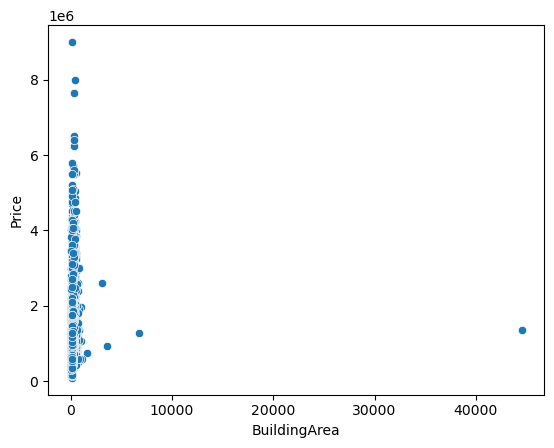

In [12]:
print(mel_df['Price'].describe())
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(mel_df,x="BuildingArea",y='Price') #빌딩 면적에 따른 가격 추이 빌딩 Area0이 너무 많고 범위가 큼

151.96764988779805


<Axes: xlabel='BuildingArea', ylabel='Price'>

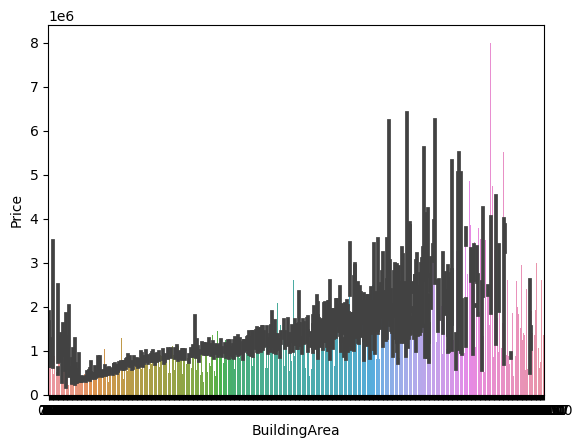

In [13]:
print(mel_df['BuildingArea'].mean())
sns.barplot(mel_df,x="BuildingArea",y='Price')

### 단순 선형 회귀

In [14]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Rooms(방갯수)와 집값 Price
X = mel_df['Rooms']
Y = mel_df['Price']

#constant 더해주자
X = sm.add_constant(X)

#Linear model을 만들어주고 fit해주자
model = sm.OLS(Y,X).fit()

#predict값
pred = model.predict(X)

#R-squared를 계산해주자
r_squared = model.rsquared

#MAE
mae = mean_absolute_error(Y,pred)

#RMSE
rmse = np.sqrt(mean_squared_error(Y,pred))

#model 요약
print(model.summary())

print('mae',mae)
print('rmse',rmse)
print('r squared',r_squared)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     4445.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:50:33   Log-Likelihood:            -1.9889e+05
No. Observations:               13580   AIC:                         3.978e+05
Df Residuals:                   13578   BIC:                         3.978e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.967e+04   1.54e+04      6.475      0.0

r squared를 봐서 Rooms와 Price는 24.66% 연관있는 것을 확인할 수 있다.    
딱히 연관성이 있는 수치가 아니다. 따라서 다양한 독립변수들을 사용하는 다중 선형회귀를 해보자

In [15]:
from sklearn.preprocessing import StandardScaler
#독립변수를 object가 아니고 Price를 제외한 나머지 사용
X = mel_df.select_dtypes(exclude='object').drop(columns=['Price'])
y = mel_df['Price']

#nan값을 제거하고 y의 index를 맞출 수 있는 코드는 다음과 같다. 
#X = X.replace([np.inf, -np.inf], np.nan).dropna()  # Remove infinite values
#y = y[X.index]  # Adjust y to match the indices of X after removing rows with missing values
#하지만 난 위에 EDA를 진행하면서 nan값을 처리해줬으므로 다음에 사용해보도록 한다.

#다양한 변수들의 scale을 맞춰주기 위해서 StandarScaler를 사용한다.
original_column_names = list(X.columns)
original_column_names.insert(0,'const')

scaler = StandardScaler()
X_scale = scaler.fit_transform(X) #scale맞춰준다.
X_scale = sm.add_constant(X_scale)

model = sm.OLS(y,X_scale).fit()

r_squared = model.rsquared

pred = model.predict(X_scale)

mae = mean_absolute_error(y,pred)
rmse = np.sqrt(mean_squared_error(y,pred))

print(model.summary(xname = original_column_names))
print(r_squared)
print(mae)
print(rmse)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     1243.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:50:33   Log-Likelihood:            -1.9577e+05
No. Observations:               13580   AIC:                         3.916e+05
Df Residuals:                   13567   BIC:                         3.917e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.076e+06   3787.767    283.989

R-squared 의 값이 0.5237로 꽤나 올라갔다.    
더 분석해보도록 하자

In [16]:
#p-value < 0.05 인 컬럼만 추출하자 (연관이 통계적으로 높다고 봐도되는)
p_val_table = model.summary(xname=original_column_names).tables[1]
print(p_val_table)

                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.076e+06   3787.767    283.989      0.000    1.07e+06    1.08e+06
Rooms           2.28e+05   1.17e+04     19.422      0.000    2.05e+05    2.51e+05
Distance      -2.601e+05   4681.464    -55.567      0.000   -2.69e+05   -2.51e+05
Postcode        7.48e+04   4862.308     15.384      0.000    6.53e+04    8.43e+04
Bedroom2       3.795e+04   1.16e+04      3.274      0.001    1.52e+04    6.07e+04
Bathroom         1.4e+05   4958.077     28.230      0.000     1.3e+05     1.5e+05
Car             6.59e+04   4255.607     15.484      0.000    5.76e+04    7.42e+04
Landsize       1.356e+04   3808.125      3.560      0.000    6093.039     2.1e+04
BuildingArea   2.348e+04   3836.985      6.120      0.000     1.6e+04     3.1e+04
YearBuilt      -1.23e+05   4013.476    -30.648      0.000   -1.31e+05   -1.15e+05
Lattitude     -1

In [17]:
## 1. Scikit-Learn 라이브러리에서 사용할 예측모델 클래스를 Import
from sklearn.linear_model import LinearRegression
## 2. 예측모델 인스턴스를 만듭니다(instantiation)
model = LinearRegression()
## 3. X 특성들의 테이블과, y 타겟 벡터 생성.
features = ['Rooms']
target = ['Price']
X_train = mel_df[features]
y_train = mel_df[target]
## 4. 모델 훈련(fit the model)
model.fit(X_train, y_train)


## 5. 새로운 데이터 한 샘플을 학습한 모델을 통해 예측
rooms = 5
X_test = [[rooms]]
y_pred = model.predict(X_test)

print(f'방이 {rooms}개인 주택의 예상 가격은 ${int(y_pred)} 입니다.')

방이 5개인 주택의 예상 가격은 $1760689 입니다.


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 로지스틱 회귀(Logistic Regression)
$$P(z) = \frac{1}{(1+e^{-z})}$$      
결과적으로 관측치가 특정 클래스에 속할 확률 값으로 계산된다.    
분류문제에서는 확률값을 사용해서 분류, 역전파 등을 하는데 확률값이 정해진 기준 값 보다 크면 1 아니면 0 이런식으로 예측한다.      


In [18]:
insur = pd.read_csv('../train.csv',index_col='id')
print(insur.head())

    Gender  Age  Driving_License  Region_Code  Previously_Insured Vehicle_Age  \
id                                                                              
1     Male   44                1         28.0                   0   > 2 Years   
2     Male   76                1          3.0                   0    1-2 Year   
3     Male   47                1         28.0                   0   > 2 Years   
4     Male   21                1         11.0                   1    < 1 Year   
5   Female   29                1         41.0                   1    < 1 Year   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
id                                                                          
1             Yes         40454.0                  26.0      217         1  
2              No         33536.0                  26.0      183         0  
3             Yes         38294.0                  26.0       27         1  
4              No         28619.0              

<Axes: xlabel='Response', ylabel='count'>

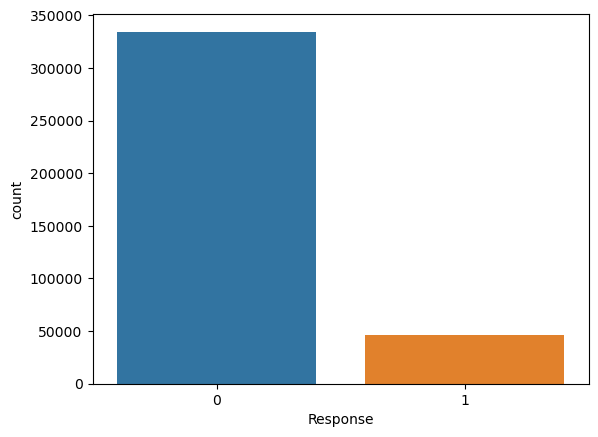

In [19]:
sns.countplot(insur,x='Response')

In [21]:
X = insur.select_dtypes(exclude='object').drop(['Response'],axis=1)
y = insur['Response']

original_column_names = list(X.columns)
original_column_names.insert(0,'const')

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
X = sm.add_constant(X_scale)
logits = sm.Logit(y,X).fit()

summary = logits.summary(xname = original_column_names)
print(summary)
print(logits.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.290076
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               381109
Model:                          Logit   Df Residuals:                   381101
Method:                           MLE   Df Model:                            7
Date:                Wed, 07 Feb 2024   Pseudo R-squ.:                  0.2202
Time:                        13:54:32   Log-Likelihood:            -1.1055e+05
converged:                       True   LL-Null:                   -1.4177e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -3.8952      0.037   -106.452      0.000      -3.967      -3.82

### 로지스틱 회귀와 선형회귀의 차이
- 로지스틱 회귀분석은 종속변수가 이진 분류 문제일때 사용한다.
- 선형 회귀분석은 종속변수가 간격 비율 등일 때 사용한다.